<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/colab/news_classification_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=10000, test_split=0.2) # test data 비율 0.2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [15]:
len(X_train)

8982

In [16]:
len(X_test)

2246

In [17]:
num_classes =max(Y_train) + 1
print('카테고리:{}'.format(num_classes)) # 0부터 시작하는 숫자로 카테고리 라벨을 부여

카테고리:46


In [18]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    X_train[0]])

In [19]:
Y_train[0]

3

In [20]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [21]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(X_train) # 훈련 데이터 벡터 변환
X_test = vectorize_sequences(X_test) # 테스트 데이터 벡터 변환

In [22]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) #데이터 손실이 4회 증가하면, 조기종료
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) #검증 데이터의 정확도가 이전보다 좋아질 경우에만!! only 모델저장!

In [26]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, callbacks=[es,mc], validation_data=(X_test,Y_test))

Epoch 1/30
71/71 [==============================] - 16s 25ms/step - loss: 2.3990 - accuracy: 0.4924 - val_loss: 1.2317 - val_accuracy: 0.7191
Epoch 2/30
71/71 [==============================] - 1s 18ms/step - loss: 0.9674 - accuracy: 0.7841 - val_loss: 1.0211 - val_accuracy: 0.7711
Epoch 3/30
71/71 [==============================] - 1s 18ms/step - loss: 0.5945 - accuracy: 0.8790 - val_loss: 0.9531 - val_accuracy: 0.7903
Epoch 4/30
71/71 [==============================] - 1s 18ms/step - loss: 0.4181 - accuracy: 0.9113 - val_loss: 1.0409 - val_accuracy: 0.7689
Epoch 5/30
71/71 [==============================] - 1s 18ms/step - loss: 0.3016 - accuracy: 0.9362 - val_loss: 0.9381 - val_accuracy: 0.8032
Epoch 6/30
71/71 [==============================] - 1s 18ms/step - loss: 0.2299 - accuracy: 0.9474 - val_loss: 1.0096 - val_accuracy: 0.7965
Epoch 7/30
71/71 [==============================] - 1s 18ms/step - loss: 0.2133 - accuracy: 0.9452 - val_loss: 1.0185 - val_accuracy: 0.7979
Epoch 8/30
7

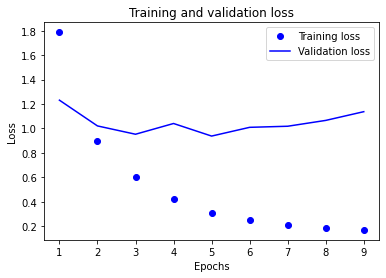

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

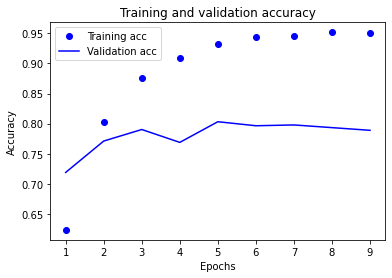

In [31]:
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
results = model.evaluate(X_test, Y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.1376 - accuracy: 0.7890


In [33]:
predictions = model.predict(X_test)

In [34]:
predictions[0].shape

(46,)

In [35]:
np.sum(predictions[0])

1.0000001

In [36]:
np.argmax(predictions[0])

4